# Random Temporal Networks v1.0 #

In [1]:
import sys
sys.path.append("/home/luffy/Bureau/Random/Library/")
import RandTempNet as rn
import numpy as np
import matplotlib.pyplot as plt
import itertools as it

## Timeline shuffling (events) ##
We here present randomization techniques which shuffle the timelines of contact of links in the static network. All functions take a `link_timeline()` object as input, and return a `link_timeline()` object.

### Events permutation $\text{P}[\mathcal{L},E]$: `P__L_E(lks_data,t_i,t_f,dt)` ###
This function randomly permutates the time stamps of events between `t_i` and `t_f` and among all timelines of a `link_timeline()` object `lks_data`. The initial time step `t_i`, final time step `t_f` and time step duration `dt` are required.

**Note:** This function returns a `tij()` object.

In [2]:
lks_data = rn.read_link_timeline("Bureau/Random/Library/lks_InVS13.dat")
new_tij = rn.P__L_E(lks_data,0,60480,1)
new_lks = rn.tijtau_to_link_timeline(rn.tij_to_tijtau(new_tij,1))

Test of the preservation of the total number of events:

In [3]:
nC0 = sum(rn.weights(lks_data).values())
nC1 = sum(rn.weights(new_lks).values())
nC0 == nC1

True

Test of the modification of the activity timeline:

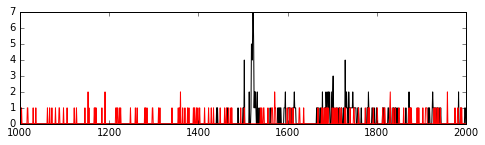

In [4]:
TL0 = rn.activity_timeline(rn.link_timeline_to_snapshot_sequence(lks_data,1,0,60480))
TL1 = rn.activity_timeline(rn.link_timeline_to_snapshot_sequence(new_lks,1,0,60480))

tmin = 1000
tmax = 2000

fig = plt.figure(figsize=(8,2))
x = range(len(TL0))[tmin:tmax]
plt.plot(x,TL0[tmin:tmax],'k-')
plt.plot(x,TL1[tmin:tmax],'r-')
plt.show()

### Events permutation with weigths preservation $\text{P}[\mathbf{w}]$: `P__w(lks_data,t_i,t_f,dt)` ###
This function randomly assigns time stamps of $w$ events between `t_i` and `t_f` for every timeline of a `link_timeline()` object `lks_data`. The initial time step `t_i`, final time step `t_f` and time step duration `dt` are required.

**Note:** This function returns a `tij()` object.

In [5]:
lks_data = rn.read_link_timeline("Bureau/Random/Library/lks_InVS13.dat")
new_tij = rn.P__w(lks_data,0,60480,1)
new_lks = rn.tijtau_to_link_timeline(rn.tij_to_tijtau(new_tij,1))

Test of the preservation of the weights:

In [6]:
w0 = rn.weights(lks_data)
w1 = rn.weights(new_lks)
Test = np.array([w0[lk] == w1[lk] for lk in lks_data.links()])
Test.all()

True

Test of the modification of the activity timeline:

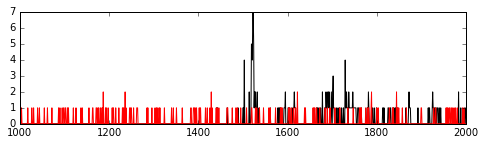

In [7]:
TL0 = rn.activity_timeline(rn.link_timeline_to_snapshot_sequence(lks_data,1,0,60480))
TL1 = rn.activity_timeline(rn.link_timeline_to_snapshot_sequence(new_lks,1,0,60480))

tmin = 1000
tmax = 2000

fig = plt.figure(figsize=(8,2))
x = range(len(TL0))[tmin:tmax]
plt.plot(x,TL0[tmin:tmax],'k-')
plt.plot(x,TL1[tmin:tmax],'r-')
plt.show()

### Events permutation with weigths, initial time and final time preservation $\text{P}[\mathbf{w},\mathbf{t}^1,\mathbf{t}^w]$: `P__w_t1_tw(lks_data,t_i,t_f,dt)` ###
This function randomly assigns time stamps of $w$ events between `t1` and `tw` for every timeline of a `link_timeline()` object `lks_data`. The initial time step `t_i`, final time step `t_f` and time step duration `dt` are required.

**Note:** This function returns a `tij()` object.

In [8]:
lks_data = rn.read_link_timeline("Bureau/Random/Library/lks_InVS13.dat")
new_tij = rn.P__w_t1_tw(lks_data,0,60480,1)
new_lks = rn.tijtau_to_link_timeline(rn.tij_to_tijtau(new_tij,1))

Test of the preservation of the weights:

In [9]:
w0 = rn.weights(lks_data)
w1 = rn.weights(new_lks)
Test = np.array([w0[lk] == w1[lk] for lk in lks_data.links()])
Test.all()

True

Test of the modification of the activity timeline:

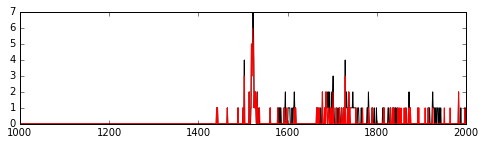

In [10]:
TL0 = rn.activity_timeline(rn.link_timeline_to_snapshot_sequence(lks_data,1,0,60480))
TL1 = rn.activity_timeline(rn.link_timeline_to_snapshot_sequence(new_lks,1,0,60480))

tmin = 1000
tmax = 2000

fig = plt.figure(figsize=(8,2))
x = range(len(TL0))[tmin:tmax]
plt.plot(x,TL0[tmin:tmax],'k-')
plt.plot(x,TL1[tmin:tmax],'r-')
plt.show()

### Global event shuffling $\text{P}[\mathbf{w},\mathbf{t}]$: `P__w_t(lks_data,dt)` ###
This function shuffles events between existing links of a `link_timeline()` object `lks_data`. The time step duration `dt` is required.

**Note:** This function returns a `tij()` object.

In [11]:
lks_data = rn.read_link_timeline("Bureau/Random/Library/lks_InVS13.dat")
new_tij = rn.P__w_t(lks_data,1)
new_lks = rn.tijtau_to_link_timeline(rn.tij_to_tijtau(new_tij,1))

Test of the preservation of the weights:

In [12]:
w0 = rn.weights(lks_data)
w1 = rn.weights(new_lks)
Test = np.array([w0[lk] == w1[lk] for lk in lks_data.links()])
Test.all()

True

Test of the preservation of the activity timeline:

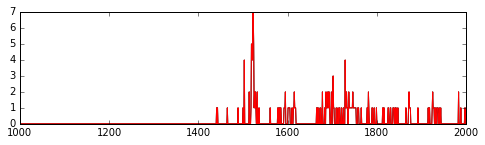

In [13]:
TL0 = rn.activity_timeline(rn.link_timeline_to_snapshot_sequence(lks_data,1,0,60480))
TL1 = rn.activity_timeline(rn.link_timeline_to_snapshot_sequence(new_lks,1,0,60480))

tmin = 1000
tmax = 2000

fig = plt.figure(figsize=(8,2))
x = range(len(TL0))[tmin:tmax]
plt.plot(x,TL0[tmin:tmax],'k-')
plt.plot(x,TL1[tmin:tmax],'r-')
plt.show()

Test of the modification of $p_\tau$:

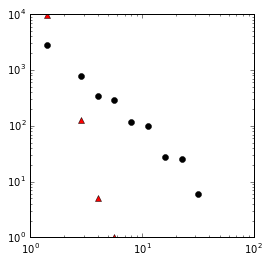

In [15]:
list_tau0 = rn.contact_durations(lks_data)
list_tau1 = rn.contact_durations(new_lks)
list_tau0 = list(it.chain(*list_tau0.values()))
list_tau1 = list(it.chain(*list_tau1.values()))

from math import log

fig = plt.figure(figsize=(4,4))
tmax = max(list_tau0)
x = 2.**(np.arange(0,log(tmax)+1,0.5))
h0 = np.histogram(list_tau0,bins=x)
h1 = np.histogram(list_tau1,bins=x)
plt.loglog(x[1:],h0[0],'ko')
plt.loglog(x[1:],h1[0],'r^')
plt.show()